
# 1. Abstracto: Motivación y Audiencia
Este proyecto busca analizar datos de la industria del combustible con el objetivo de identificar patrones y tendencias que puedan ser útiles para la toma de decisiones estratégicas. A través de la evaluación de precios, impuestos y márgenes de ganancia, se pretende proporcionar una visión clara de cómo estos factores varían según el tipo de combustible y cómo pueden influir en el comportamiento del mercado y las políticas de precios.
Audiencia: Ejecutivos de empresas petroleras, analistas de datos, responsables de políticas energéticas, investigadores del sector energético, y autoridades gubernamentales encargadas de la regulación de precios y el mercado de combustibles.



# 2. Definición del problema y preguntas/hipótesis
¿Cómo varía el precio total del combustible según el tipo de combustible?
¿El impuesto aplicado al combustible depende del tipo de combustible?
¿Existe una relación entre el margen promedio y el tipo de combustible?


url_api = "https://api.recope.go.cr/ventas/precio/consumidor"


Resumen de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           4 non-null      int64  
 1   tipo            4 non-null      object 
 2   impuesto        4 non-null      object 
 3   precsinimp      4 non-null      float64
 4   fechaupd        4 non-null      object 
 5   id              4 non-null      object 
 6   preciototal     4 non-null      float64
 7   nomprod         4 non-null      object 
 8   margenpromedio  4 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 420.0+ bytes
None
Descripción estadística:
            fecha  precsinimp  preciototal
count         4.0    4.000000     4.000000
mean   20250318.0  352.320000   615.500000
std           0.0   18.539959    76.935038
min    20250318.0  335.580000   517.000000
25%    20250318.0  336.772500   573.250000
50%    20250318.0  351.44500

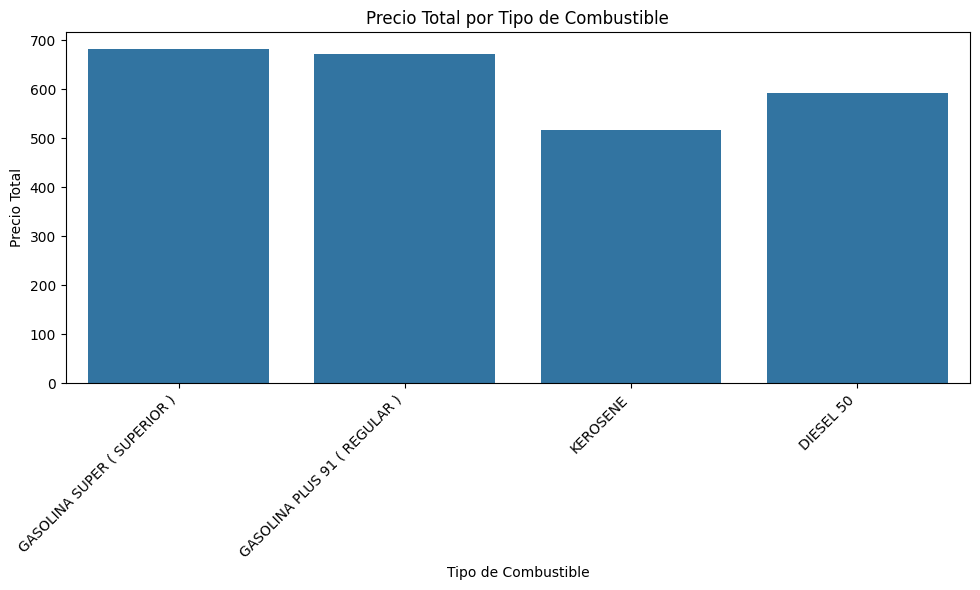

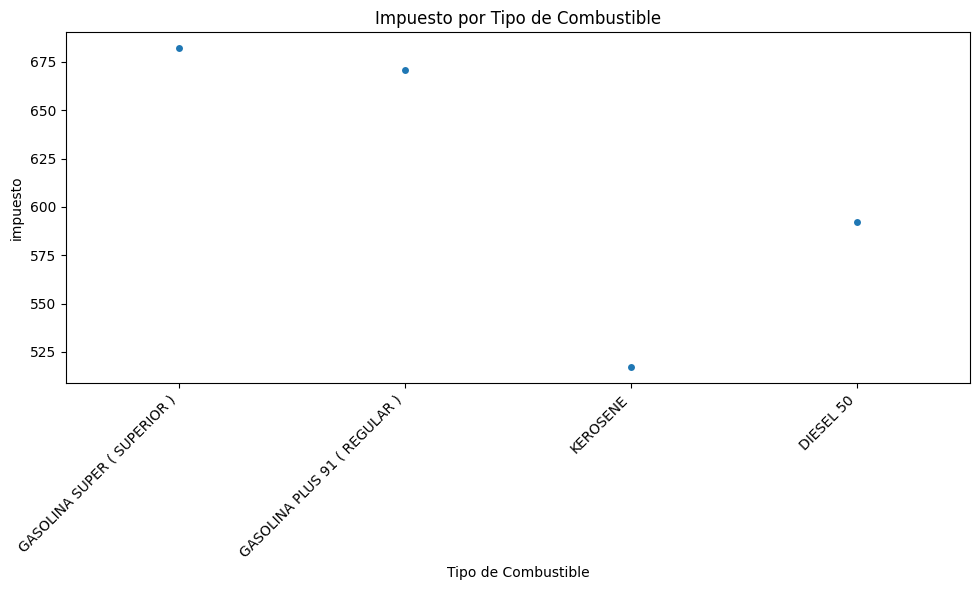

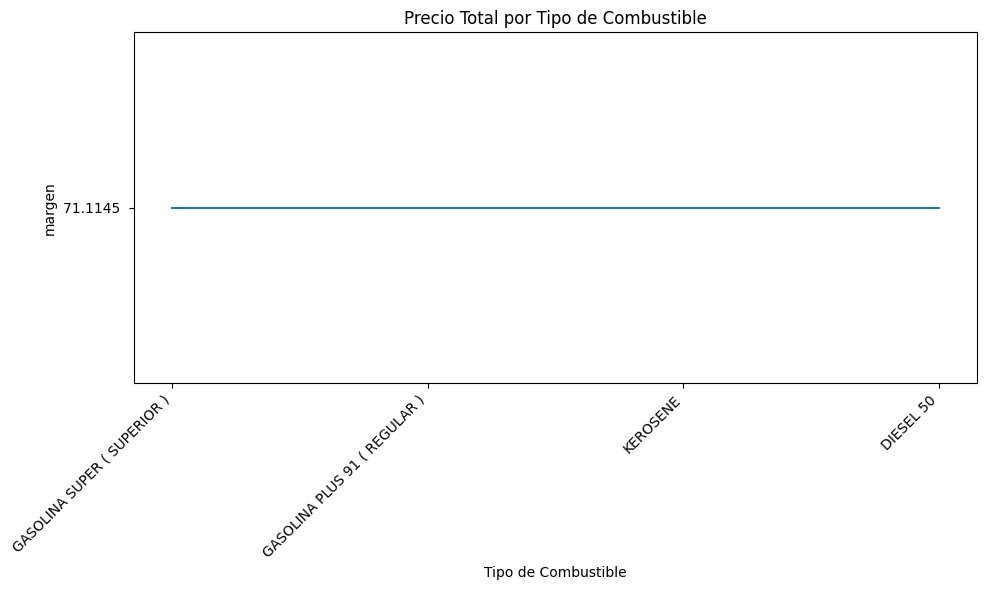

Dataset guardado correctamente.


In [53]:
import pandas as pd
import json

# 3. Cargar datos desde un archivo JSON local
def cargar_datos_json(archivo_json):
    try:
        # Abrir y cargar el archivo JSON
        with open(archivo_json, 'r') as f:
            data = json.load(f)
        
        # Verificar si los datos tienen el formato esperado (lista de diccionarios)
        if isinstance(data, list):
            return pd.DataFrame(data)
        else:
            print("Formato de datos inesperado.")
            return None
    except Exception as e:
        print(f"Error al cargar el archivo JSON: {e}")
        return None

# Nombre del archivo JSON local
archivo_json = "data.json"
df = cargar_datos_json(archivo_json)

# 4. Limpieza y transformación de datos
if df is not None:
    df.dropna(inplace=True)  # Eliminar valores nulos
   # df.drop_duplicates(inplace=True)  # Eliminar duplicados
    
    # Convertir columnas relevantes a tipos adecuados
    df['fecha'] = pd.to_numeric(df['fecha'])
    df['preciototal'] = pd.to_numeric(df['preciototal'])
    df['precsinimp'] = pd.to_numeric(df['precsinimp'])

    # Eliminar posibles filas con valores nulos en las columnas claves después de la conversión
    #  df.dropna(subset=['fecha', 'preciototal', 'precsinimp'], inplace=True)

# 5. Análisis exploratorio de datos (EDA)
if df is not None:
    print("Resumen de los datos:")
    print(df.info())
    print("Descripción estadística:")
    print(df.describe())
    
    # Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Gráfico de precios por tipo de combustible (barra)
plt.figure(figsize=(10, 6))
sns.barplot(x='nomprod', y='preciototal', data=df)
plt.title("Precio Total por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio Total")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 1. Gráfico de precios por tipo de combustible (barra)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='nomprod', y='preciototal', data=df)
plt.title("Impuesto por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("impuesto")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 1. Gráfico de precios por tipo de combustible (barra)
plt.figure(figsize=(10, 6))
sns.lineplot(x='nomprod', y='margenpromedio', data=df)
plt.title("Precio Total por Tipo de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("margen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 6. Guardar el dataset limpio en un archivo CSV
if df is not None:
    df.to_csv("dataset_limpio_recope.csv", index=False)
    print("Dataset guardado correctamente.")

